### Calculating Rotational Period from Light Curve Data
#### Simple case which generates a light curve (brightness vs. time) with random noise.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Simulate light curve data: time (hours) and magnitude (brightness)
# includes noise in the light curve
np.random.seed(42)  # For reproducibility
time = np.linspace(0, 48, 1000)  # 48 hours of observation
period = 7.2  # True rotational period in hours (example)
signal = 10 + 0.5 * np.sin(2 * np.pi * time / period) + np.random.normal(0, 0.1, len(time))


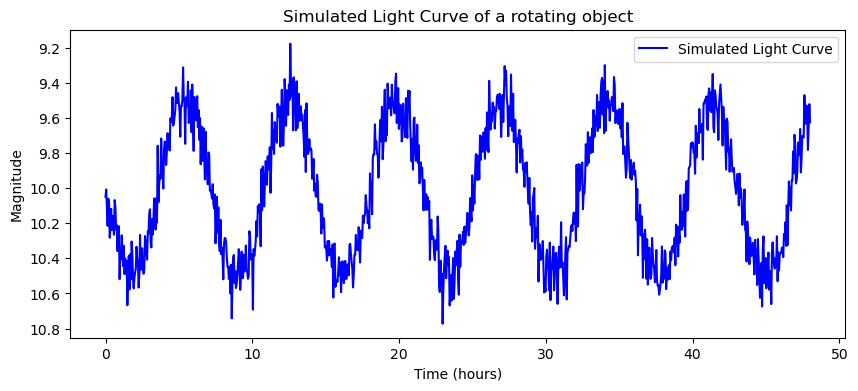

The Y axis for magnitude is inverted. Magnitude increases as brightness decreases.


In [7]:
# Plot the light curve
plt.figure(figsize=(10, 4))
plt.plot(time, signal, 'b-', label='Simulated Light Curve')
plt.xlabel('Time (hours)')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()
plt.title('Simulated Light Curve of a rotating object')
plt.legend()
plt.show()
print(f"The Y axis for magnitude is inverted. Magnitude increases as brightness decreases.")

#### Use Python to estimate the rotational period via Fourier analysis, NumPy for computations, and Matplotlib for visualization.
##### Fourier Transform: Using scipy.fft, the time-domain signal is transformed into the frequency domain.
##### Period Calculation: The peak frequency corresponds to the rotation rate, and the period is its inverse.



In [8]:
# Perform Fourier Transform to find the dominant frequency
n = len(time)
dt = time[1] - time[0]  # Time step
fourier = fft(signal)
freq = fftfreq(n, dt)  # Frequency bins
power = np.abs(fourier) ** 2  # Power spectrum

# Only consider positive frequencies
positive_mask = freq > 0
freq = freq[positive_mask]
power = power[positive_mask]

# Find the dominant frequency (peak in power spectrum)
peak_freq = freq[np.argmax(power)]
rotational_period = 1 / peak_freq  # Period = 1 / frequency

print(f"Estimated Rotational Period: {rotational_period:.2f} hours")
print(f"Estimated Frequency: {peak_freq:.3f} rotations/hour")


Estimated Rotational Period: 6.86 hours
Estimated Frequency: 0.146 rotations/hour


#### Plot the power spectrum from a Fourier Analysis of Light Curve

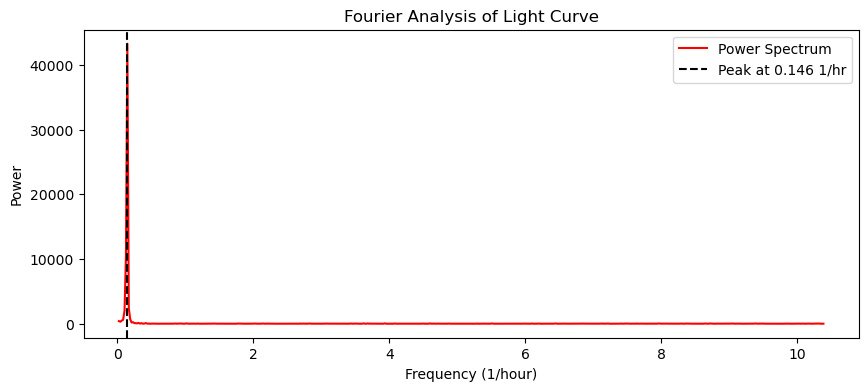

In [9]:
# Plot the power spectrum
plt.figure(figsize=(10, 4))
plt.plot(freq, power, 'r-', label='Power Spectrum')
plt.xlabel('Frequency (1/hour)')
plt.ylabel('Power')
plt.title('Fourier Analysis of Light Curve')
plt.axvline(peak_freq, color='k', linestyle='--', label=f'Peak at {peak_freq:.3f} 1/hr')
plt.legend()
plt.show()

#### Fourier Analysis found the rotational period evern with noise in the light curve.


#### Convert pole orientation (RA, Dec) to Cartesian coordinates


In [10]:
# Example: Convert pole orientation (RA, Dec) to Cartesian coordinates
ra = 45  # Right Ascension in degrees
dec = 30  # Declination in degrees
period = 6.5  # Hours

# Convert to radians
ra_rad = np.radians(ra)
dec_rad = np.radians(dec)

# Spin vector in Cartesian coordinates (assuming unit magnitude)
x = np.cos(dec_rad) * np.cos(ra_rad)
y = np.cos(dec_rad) * np.sin(ra_rad)
z = np.sin(dec_rad)

spin_vector = np.array([x, y, z])
print(f"Spin Vector: {spin_vector}")
print(f"Rotational Period: {period} hours")
print(f"Spin Vector is a unit vector of length: {np.sqrt(spin_vector[0]*spin_vector[0] + spin_vector[1]*spin_vector[1] + spin_vector[2]*spin_vector[2])}")


Spin Vector: [0.61237244 0.61237244 0.5       ]
Rotational Period: 6.5 hours
Spin Vector is a unit vector of length: 1.0


The Spin Vector is a unit vector pointing along the spin axis. 
The angular velocity could be calculated as ω=2π/period (in radians per hour).

A real-world example may involve irregular shapes, such as roations of elongated ellipsoids, precession, and non-principal axis rotation

